HEIGHTS 


In [1]:
# importing the libraries
#data analysis,Maths or arrays,Kpi(graphs),kpi(graphs),,,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")


#set to display all the columns in datset

pd.set_option("display.max_columns",None)

# to run sql queries on data frame
import pandasql as psql

In [2]:
#reading the dataset from csv file

HOutliers  = pd.read_csv(r"E:\AIML INTERNSHIP\Datasets\Height-01.csv",header=0)

HOutliers.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
HOutliers.shape

(10000, 2)

In [4]:
HOutliers.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


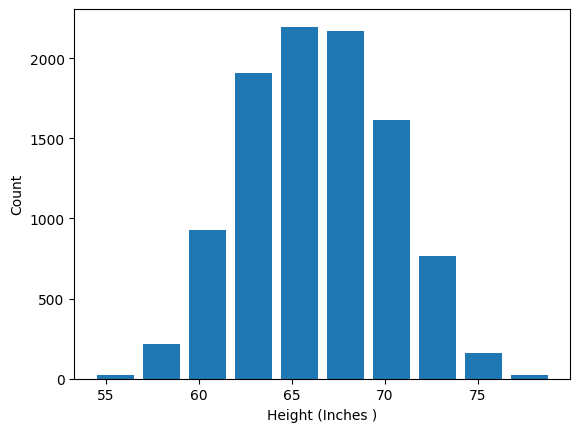

In [5]:
#plotting 

plt.hist(HOutliers.Height,bins=10,rwidth=0.8)
plt.xlabel("Height (Inches )")
plt.ylabel("Count")
plt.show()


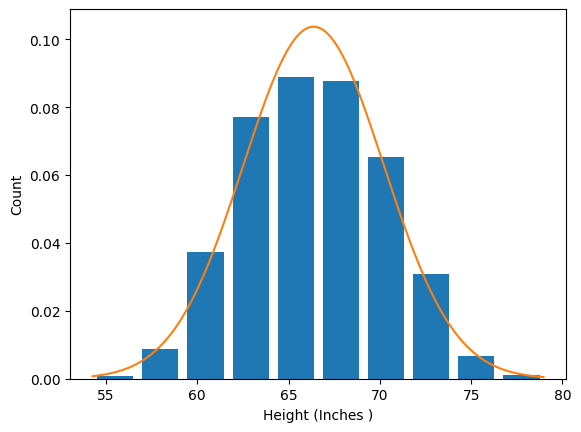

In [6]:
#gaussian distribution 

from scipy.stats import norm

plt.hist(HOutliers.Height,bins=10,rwidth=0.8,density=True)

plt.xlabel("Height (Inches )")

plt.ylabel("Count")

rng = np.arange(HOutliers.Height.min(),HOutliers.Height.max(),0.1)

plt.plot(rng,norm.pdf(rng,HOutliers.Height.mean(),HOutliers.Height.std()))

In [7]:
# calculate the standard deviation

HOutliers.Height.std()

3.847528120795573

In [8]:
# calculate the upper limit as upper limit = mean + 3*std

upper_limit = HOutliers.Height.mean() + 3*HOutliers.Height.std()

upper_limit


77.91014411725271

In [9]:
#calculate the lower limit as lower limit = mean - 3*std

lower_limit = HOutliers.Height.mean() - 3*HOutliers.Height.std()

lower_limit

54.824975392479274

In [10]:
print(HOutliers.Height.min())
print(HOutliers.Height.max())

54.26313333
78.99874235


In [11]:
#display the outlier in the dataset

HOutliers[(HOutliers.Height>upper_limit) | (HOutliers.Height<lower_limit)]



,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [12]:
#Eliminate the outliers and generate the new dataset

HOutliersNew = HOutliers[(HOutliers.Height<upper_limit) & (HOutliers.Height>lower_limit)]

HOutliersNew.head()


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [13]:
HOutliersNew.shape

(9993, 2)

METHOD 2 : USING Z-SCORE

In [14]:
# Z score indicate how many standard deviation away a data point is
# Calculate the Z score = (X - m)/Sigma, where m = mean, Sigma = standard deviation

HOutliers['ZScore'] = (HOutliers.Height - HOutliers.Height.mean()) / HOutliers.Height.std()
HOutliers_new2 = HOutliers[(HOutliers.ZScore>-3) & (HOutliers.ZScore<3)]
HOutliers.shape[0] - HOutliers_new2.shape[0]

7

In [15]:
HOutliers_new2_O = HOutliers[(HOutliers.ZScore<-3) | (HOutliers.ZScore>3)]
HOutliers_new2_O

,Gender,Height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [16]:
#calculating the Q1,Q3 and IQR

Q1 = HOutliers.Height.quantile(0.25)
Q3 = HOutliers.Height.quantile(0.75)
IQR = Q3 - Q1



In [17]:
upper_bound = Q3 + 1.5*IQR

lower_bound = Q1 - 1.5*IQR

print(upper_bound)
print(lower_bound)



77.67722359875002
55.00265860875


In [18]:
HOutliers[(HOutliers.Height>upper_bound) | (HOutliers.Height<lower_bound)]

,Gender,Height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
7294,Female,54.873728,-2.987329
9285,Female,54.263133,-3.146027


In [19]:
HOutliers_new4 = HOutliers[(HOutliers.Height<upper_bound) & (HOutliers.Height>lower_bound)]

HOutliers_new4


,Gender,Height,ZScore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
